ValueError: x and y must be the same size

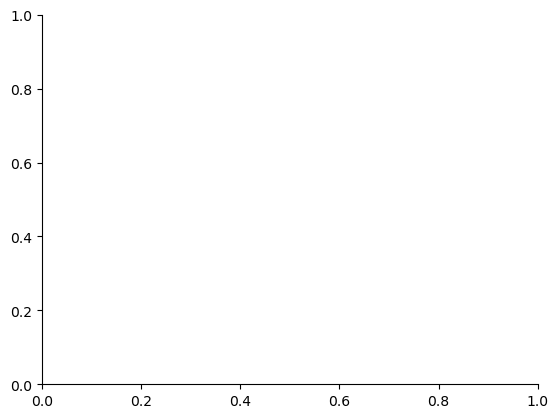

In [4]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def plot_delta_weights_summary(reorganized_data, filepath_list, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(1, 1)
        
    #loop through the files and extract and copute the delta weights 
    for filepath in filepath_list:
        reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset

        GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
        GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')

        delta_weights = {}

        for animal in reorganized_data:
            delta_weights[animal] = []
            for i in range(len(GLM_params_first[animal])):
                weights_first = GLM_params_first[animal][i]['weights']
                weights_last = GLM_params_last[animal][i]['weights']

                delta = weights_last - weights_first
                delta_weights[animal].append(delta)
    
    
    
    ################################ setup for plotting ###################################
    
    animal_averages = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    global_sem = global_std / np.sqrt(len(animal_averages))
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    
    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5, len(variable_list)-0.5])
    
    
    
    
    
    # Plot and save the figure for the current dataset
    fig, ax = plt.subplots(figsize=(10, 5))
#     max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)

    # Prepare data for the 2D scatter plot of the most varying variables
    x_data = np.concatenate([np.array(delta_weights[animal])[:, max_index] for animal in delta_weights])
    y_data = np.concatenate([np.array(delta_weights[animal])[:, second_max_index] for animal in delta_weights])

    # Plot 2D scatter with best fit line
    fig, ax2 = plt.subplots(figsize=(7, 5))
    ax2.scatter(x_data, y_data, color='blue', alpha=0.6)
    ax2.set_xlabel(f"Δ {variable_list[1:][max_index]}")
    ax2.set_ylabel(f"Δ {variable_list[1:][second_max_index]}")
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.axvline(0, color='gray', linestyle='--')

    # Add line of best fit
    m, b = np.polyfit(x_data, y_data, 1)
    ax2.plot(x_data, m*x_data + b, color='red', linestyle='--')
    ax2.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')

    plt.show()
    
    
    return plotted_summary 

plot_delta_weights_summary = plot_delta_weights_summary(reorganized_data, filepath_list, ax=None)


Length mismatch in scatter plot for animal animal_1, neuron 0
Length mismatch in scatter plot for animal animal_1, neuron 1
Length mismatch in scatter plot for animal animal_1, neuron 2
Length mismatch in scatter plot for animal animal_1, neuron 3
Length mismatch in scatter plot for animal animal_1, neuron 4


ValueError: x and y must be the same size

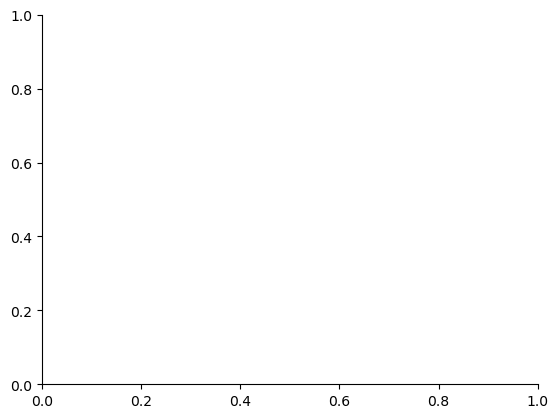

In [5]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def plot_delta_weights_summary(filepath_list, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    
    delta_weights = {}  # Initialize a dictionary to store delta weights across all files
    
    # Loop through the files and extract and compute the delta weights
    for filepath in filepath_list:
        reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset

        GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
        GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')

        delta_weights[filepath] = {}

        for animal in reorganized_data:
            delta_weights[filepath][animal] = []
            for i in range(len(GLM_params_first[animal])):
                weights_first = GLM_params_first[animal][i]['weights']
                weights_last = GLM_params_last[animal][i]['weights']

                delta = weights_last - weights_first
                delta_weights[filepath][animal].append(delta)
    
    ################################ setup for plotting ###################################
    animal_averages = []
    jitter = 0.25

    for filepath in delta_weights:
        for animal_key in delta_weights[filepath]:
            neuron_weights = []
            for neuron_nr in range(len(delta_weights[filepath][animal_key])):
                neuron_weights.append(delta_weights[filepath][animal_key][neuron_nr])
                
                jittered_x = np.arange(len(variable_list)) + np.random.uniform(-jitter, jitter, len(variable_list))
                
                # Ensure that the lengths of jittered_x and neuron_weights match
                if len(jittered_x) == len(delta_weights[filepath][animal_key][neuron_nr]):
                    ax.scatter(jittered_x, delta_weights[filepath][animal_key][neuron_nr], color='grey', alpha=0.2, s=10)
                else:
                    print(f"Length mismatch in scatter plot for animal {animal_key}, neuron {neuron_nr}")

            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    global_sem = global_std / np.sqrt(len(animal_averages))
    
    ax.errorbar(np.arange(len(variable_list)), global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5, len(variable_list)-0.5])
    
    # Plot 2D scatter of the most varying variables
    x_data = np.concatenate([np.array(delta_weights[filepath][animal])[:, max_index] for filepath in delta_weights for animal in delta_weights[filepath]])
    y_data = np.concatenate([np.array(delta_weights[filepath][animal])[:, second_max_index] for filepath in delta_weights for animal in delta_weights[filepath]])

    # Plot 2D scatter with best fit line
    fig, ax2 = plt.subplots(figsize=(7, 5))
    ax2.scatter(x_data, y_data, color='blue', alpha=0.6)
    ax2.set_xlabel(f"Δ {variable_list[max_index]}")
    ax2.set_ylabel(f"Δ {variable_list[second_max_index]}")
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.axvline(0, color='gray', linestyle='--')

    # Add line of best fit
    m, b = np.polyfit(x_data, y_data, 1)
    ax2.plot(x_data, m*x_data + b, color='red', linestyle='--')
    ax2.set_title(f'2D Scatter Plot of Most Differing Variables')

    plt.show()
    
    return delta_weights

# Run the function
plot_delta_weights_summary(filepath_list)


ValueError: x and y must be the same size

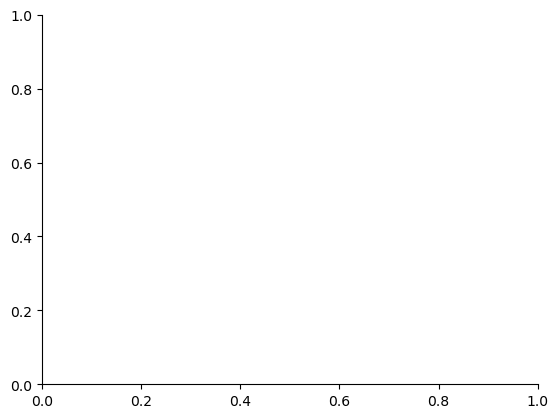

In [11]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def plot_delta_weights_summary(delta_weights, model_name=None, save=False, ax=None):
    
    reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset

    if ax is None:
        fig, ax = plt.subplots(1, 1)

    animal_averages = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    global_sem = global_std / np.sqrt(len(animal_averages))
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    
    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5, len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    return max_index, second_max_index

def get_delta_weights(max_index, second_max_index, filepath_list):

    for filepath in filepath_list:
        reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset

        GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
        GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')

        delta_weights = {}

        for animal in reorganized_data:
            delta_weights[animal] = []
            for i in range(len(GLM_params_first[animal])):
                weights_first = GLM_params_first[animal][i]['weights']
                weights_last = GLM_params_last[animal][i]['weights']

                delta = weights_last - weights_first
                delta_weights[animal].append(delta)

        # Plot and save the figure for the current dataset
        fig, ax = plt.subplots(figsize=(10, 5))
        max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)

        # Prepare data for the 2D scatter plot of the most varying variables
        x_data = np.concatenate([np.array(delta_weights[animal])[:, max_index] for animal in delta_weights])
        y_data = np.concatenate([np.array(delta_weights[animal])[:, second_max_index] for animal in delta_weights])

        # Plot 2D scatter with best fit line
        fig, ax2 = plt.subplots(figsize=(7, 5))
        ax2.scatter(x_data, y_data, color='blue', alpha=0.6)
        ax2.set_xlabel(f"Δ {variable_list[1:][max_index]}")
        ax2.set_ylabel(f"Δ {variable_list[1:][second_max_index]}")
        ax2.axhline(0, color='gray', linestyle='--')
        ax2.axvline(0, color='gray', linestyle='--')

        # Add line of best fit
        m, b = np.polyfit(x_data, y_data, 1)
        ax2.plot(x_data, m*x_data + b, color='red', linestyle='--')
        ax2.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')

        plt.show()
        
        return delta_weights 

plot_delta_weights_summary = plot_delta_weights_summary(delta_weights, model_name=None, save=False, ax=None)
get_delta_weights = get_delta_weights(max_index, second_max_index, filepath_list)


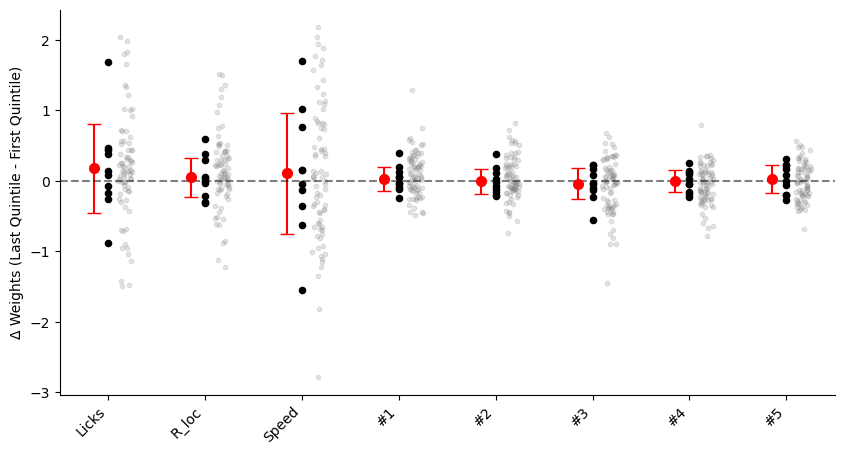

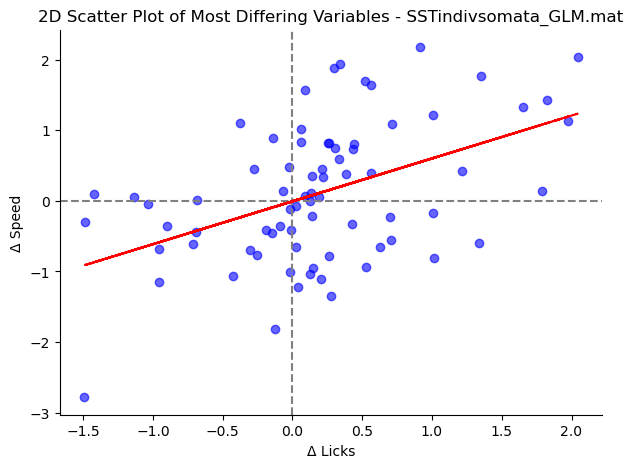

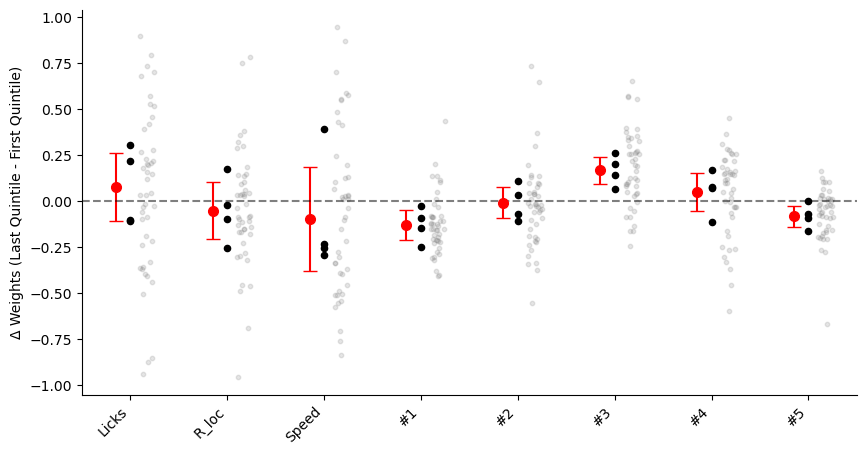

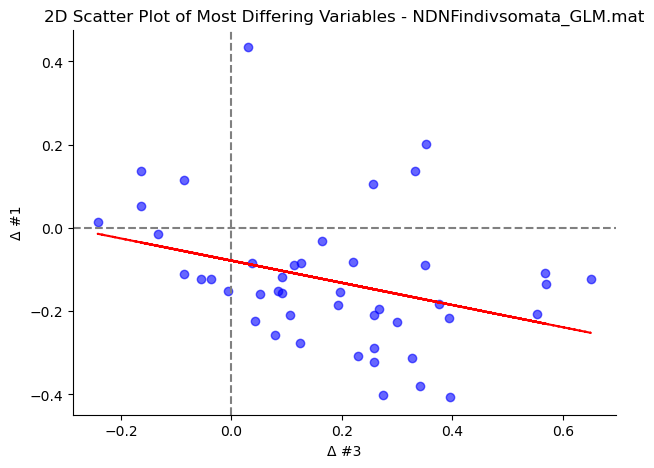

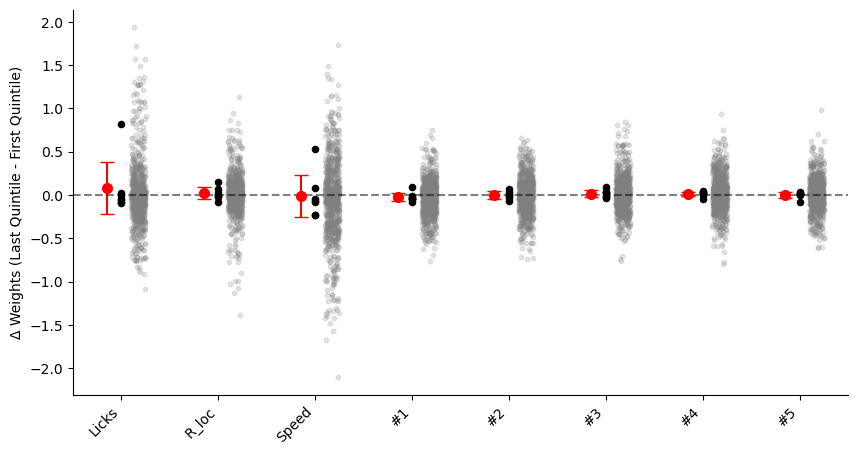

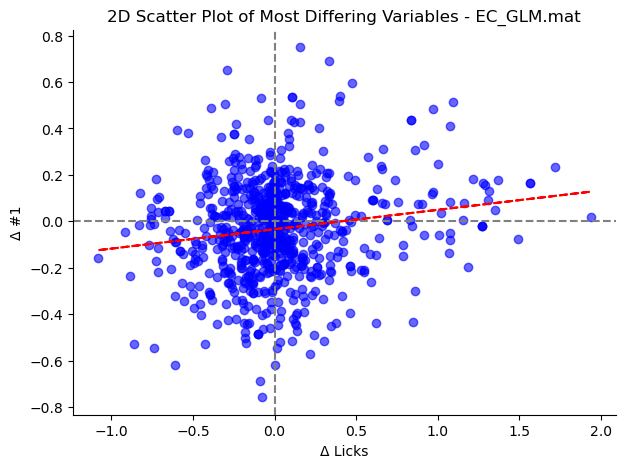

In [12]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def calculate_delta_weights(reorganized_data, GLM_params_first, GLM_params_last):
    delta_weights = {}

    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']

            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    return delta_weights

def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    animal_averages = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    global_sem = global_std / np.sqrt(len(animal_averages))
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5, len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    return max_index, second_max_index

def get_delta_weights_and_plot(filepath_list):
    for filepath in filepath_list:
        reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset

        GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
        GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')

        delta_weights = calculate_delta_weights(reorganized_data, GLM_params_first, GLM_params_last)

        # Plot and save the figure for the current dataset
        fig, ax = plt.subplots(figsize=(10, 5))
        max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)

        # Prepare data for the 2D scatter plot of the most varying variables
        x_data = np.concatenate([np.array(delta_weights[animal])[:, max_index] for animal in delta_weights])
        y_data = np.concatenate([np.array(delta_weights[animal])[:, second_max_index] for animal in delta_weights])

        # Plot 2D scatter with best fit line
        fig, ax2 = plt.subplots(figsize=(7, 5))
        ax2.scatter(x_data, y_data, color='blue', alpha=0.6)
        ax2.set_xlabel(f"Δ {variable_list[1:][max_index]}")
        ax2.set_ylabel(f"Δ {variable_list[1:][second_max_index]}")
        ax2.axhline(0, color='gray', linestyle='--')
        ax2.axvline(0, color='gray', linestyle='--')

        # Add line of best fit
        m, b = np.polyfit(x_data, y_data, 1)
        ax2.plot(x_data, m*x_data + b, color='red', linestyle='--')
        ax2.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')

        plt.show()

# Call the function to execute the workflow
get_delta_weights_and_plot(filepath_list)
